# Cost-sensitive sampling

In the previous notebook, we just wanted to get the same number of positives and negatives. However, we could also choose the number of positives and negatives **that takes the costs into account**.

We will resample data such that the positive-negative ratio is equal to:

$$
r_{cs} = \frac{|N^+|}{|N^-|}\cdot\frac{C_{FN}}{C_{FP}},
$$

with $|N^+|$ and $|N^-|$ the original number of positive, resp. negative, classes and $C_{FN}$, $C_{FP}$ the cost of false negative and false positive, respectively.

Note that the costs for a false negative and false positive classification vary for each transaction, so each transaction yields a different ratio. To obtain a global ratio, we will compute the **average all record-specific ratios**.

In [1]:
def get_cost_sensitive_sampling_ratios(df_train):
    """
    Return the cost-sensitive sampling ratio of each record.
    
    Args:
        df_train: The training dataframe. It should contain the columns
            "Class", "C_FN" and "C_FP" with the class, false negative cost
            and false positive cost, respectively.
    """
    n_pos = df_train['Class'].sum()
    n_neg = len(df_train) - n_pos

    return (df_train['C_FN'] / df_train['C_FP']) * (n_pos / n_neg)

## Train

> **Note**: you can download the dataset [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). Create a new folder called `data` in the directory of this notebook and move the downloaded csv file into that folder. Next, rename the csv file to `creditcard_fraud_dataset.csv`.

In [2]:
from lib.creditcard_fraud_dataset import get_train_test_dfs

df_train, df_test = get_train_test_dfs()

In [3]:
record_spec_r_cs = get_cost_sensitive_sampling_ratios(df_train)
global_r_cs = record_spec_r_cs.mean()

n_pos = df_train['Class'].sum()
n_neg = int(n_pos / global_r_cs)

In [4]:
from lib.cs_train import train_clf


clf_subsamp = train_clf(
    df_train,
    n_neg=n_neg
)

clf_no_subsamp = train_clf(
    df_train,
    n_neg=-1
)

## Evaluate

In [5]:
from lib.cs_eval import evaluate_clf

eval_metrics_subsamp = evaluate_clf(clf_subsamp, df_test)
eval_metrics_no_subsamp = evaluate_clf(clf_no_subsamp, df_test)

In [6]:
import pandas as pd

df = pd.DataFrame([
    {
        'method': 'Subsampled',
        **eval_metrics_subsamp
    },
    {
        'method': 'Not Subsampled',
        **eval_metrics_no_subsamp
    }
])

In [7]:
df

,method,cost_precision,cost_recall,tp_amount,fp_amount,fn_amount,net
0,Subsampled,0.959584,0.800632,25025.00,1054.0,6231.57,17739.43
1,Not Subsampled,0.997766,0.514306,16075.45,36.0,15181.12,858.33


Text(0.5, 1.0, 'Cost Recall')

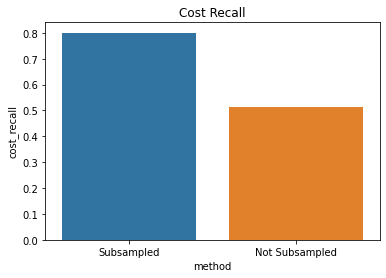

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='method', y='cost_recall')
plt.title('Cost Recall')

Text(0.5, 1.0, 'Cost Precision')

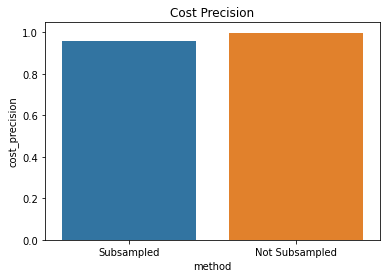

In [9]:
sns.barplot(data=df, x='method', y='cost_precision')
plt.title('Cost Precision')